<a href="https://colab.research.google.com/github/jtanzi56/Spanish-Wine-Data-price-prediction-/blob/main/Sp_Wine_Data_jtanzi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wine Sales Modeling
By: Jacob Tanzi

Will use the wine sales data to predict the price of wine

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, \
precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay, \
classification_report

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week07/Data/wines_SPA.csv")
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


## Cleaning and EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [ ]:
df.describe()

,rating,num_reviews,price,body,acidity
count,7500.000000,7500.000000,7500.000000,6331.000000,6331.000000
mean,4.254933,451.109067,60.095822,4.158427,2.946612
std,0.118029,723.001856,150.356676,0.583352,0.248202
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.200000,389.000000,18.900000,4.000000,3.000000
50%,4.200000,404.000000,28.530000,4.000000,3.000000
75%,4.200000,415.000000,51.350000,5.000000,3.000000
max,4.900000,32624.000000,3119.080000,5.000000,3.000000


In [ ]:
df.duplicated().sum()

5452

In [ ]:
df.drop_duplicates( keep='first', inplace=True, ignore_index=False)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [ ]:
 df.drop(columns=['country'], inplace=True)
 df.head()


,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [ ]:
df.nunique()

winery          480
wine            847
year             71
rating            8
num_reviews     817
region           76
price          1292
type             21
body              4
acidity           3
dtype: int64

In [ ]:
pd.Series({c: df[c].unique() for c in df})

winery         [Teso La Monja, Artadi, Vega Sicilia, Pago de ...
wine           [Tinto, Vina El Pison, Unico, Unico Reserva Es...
year           [2013, 2018, 2009, 1999, 1996, 1998, 2010, 199...
rating                  [4.9, 4.8, 4.7, 4.6, 4.5, 4.4, 4.3, 4.2]
num_reviews    [58, 31, 1793, 1705, 1309, 1209, 1201, 926, 64...
region         [Toro, Vino de Espana, Ribera del Duero, Monti...
price          [995.0, 313.5, 324.95, 692.96, 778.06, 490.0, ...
type           [Toro Red, Tempranillo, Ribera Del Duero Red, ...
body                                   [5.0, 4.0, 3.0, nan, 2.0]
acidity                                     [3.0, 2.0, 1.0, nan]
dtype: object

In [ ]:
df.isna().sum()

winery           0
wine             0
year             2
rating           0
num_reviews      0
region           0
price            0
type           106
body           271
acidity        271
dtype: int64

In [ ]:
df.isna().sum() / len(df) * 100

winery          0.000000
wine            0.000000
year            0.097656
rating          0.000000
num_reviews     0.000000
region          0.000000
price           0.000000
type            5.175781
body           13.232422
acidity        13.232422
dtype: float64

In [ ]:
df.dtypes

winery          object
wine            object
year            object
rating         float64
num_reviews      int64
region          object
price          float64
type            object
body           float64
acidity        float64
dtype: object

* checking for typos or inconsistency

In [ ]:
pd.set_option('display.max_rows', None)
df['type'].value_counts().sort_index(ascending=True)

Albarino                 34
Cabernet Sauvignon       11
Cava                     33
Chardonnay               13
Grenache                 35
Mencia                   17
Monastrell               18
Montsant Red             17
Pedro Ximenez            35
Priorat Red             238
Red                     210
Ribera Del Duero Red    535
Rioja Red               451
Rioja White              37
Sauvignon Blanc           4
Sherry                   56
Sparkling                 5
Syrah                    15
Tempranillo              73
Toro Red                 78
Verdejo                  27
Name: type, dtype: int64

In [ ]:
pd.set_option('display.max_rows', None)
df['region'].value_counts().sort_index(ascending=True)

Abona                                1
Alella                               4
Alicante                            15
Almansa                              7
Andalucia                            4
Aragon                               2
Arinzano                             3
Arribes                              1
Bierzo                              26
Binissalem-Mallorca                  1
Cadiz                                7
Calatayud                            2
Campo de Borja                      16
Carinena                             3
Castilla                             8
Castilla y Leon                     51
Cataluna                            10
Cava                                34
Cigales                              2
Conca de Barbera                     6
Condado de Huelva                    1
Costers del Segre                   14
Dehesa del Carrizal                  3
Dominio de Valdepusa                 4
El Terrerazo                         4
Emporda                  

In [ ]:
pd.set_option('display.max_rows', None)
df['wine'].value_counts().sort_index(ascending=True)

1194                                                                       1
17                                                                         1
1730 Amontillado                                                           1
1730 Pedro Ximenez                                                         1
1902 Centenary Carignan Priorat                                            4
1903 Centenary Grenache                                                    1
200 Cestos Godello                                                         1
200 Monges Edicion Exclusiva Blanco Reserva                                1
200 Monges Rioja Gran Reserva                                              2
200 Monges Rioja Reserva                                                   5
200 Monges Rioja Reserva Seleccion Especial                                1
200 Monges Rioja Seleccion Especial Reserva Blanco                         1
27 Ribera del Duero                                                        3

In [ ]:
pd.set_option('display.max_rows', None)
df['winery'].value_counts().sort_index(ascending=True)

A Coroa                                              1
AGE                                                  1
Aalto                                               12
Abadal                                               3
Abadia Retuerta                                     27
Abel Mendoza Monge                                   4
Acustic Celler                                       1
Adama Wines                                          4
Adega Familiar Eladio Pineiro                        1
Agusti Torello Mata                                  5
Albamar                                              1
Albet i Noya                                         2
Algueira                                             1
Alion                                               16
Allende                                             14
Alonso & Pedrajo                                     1
Alonso del Yerro                                     2
Alta Alella                                          4
Altanza   

## Outlier Visuals

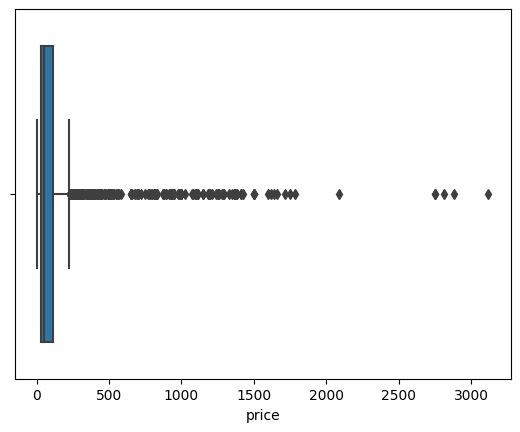

In [ ]:
ax = sns.boxplot(data = df, x = 'price');

In [ ]:
df.describe()

,rating,num_reviews,price,body,acidity
count,2048.000000,2048.000000,2048.000000,1777.000000,1777.000000
mean,4.401123,573.994629,135.242194,4.258863,2.921216
std,0.147023,1376.153171,272.178316,0.652836,0.334713
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.300000,58.000000,31.917947,4.000000,3.000000
50%,4.400000,141.000000,53.625000,4.000000,3.000000
75%,4.500000,485.500000,110.000000,5.000000,3.000000
max,4.900000,32624.000000,3119.080000,5.000000,3.000000


* is 3119.08 an outlier that is incorrect?

In [ ]:
target_integer = 3119.080000
found_rows = df[df['price'] == target_integer]
print(found_rows)

                           winery                          wine  year  rating  \
338  Descendientes de J. Palacios  La Faraona Bierzo (Corullon)  2010     4.6   

     num_reviews  region    price type  body  acidity  
338           28  Bierzo  3119.08  Red   4.0      3.0  


In [ ]:
df.loc[df['winery'] == 'Descendientes de J. Palacios']



,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
43,Descendientes de J. Palacios,La Faraona Bierzo (Corullon),2017,4.8,26,Bierzo,1098.90,Red,4.0,3.0
293,Descendientes de J. Palacios,Moncerbal Bierzo (Corullon),2016,4.6,48,Bierzo,269.95,Mencia,3.0,3.0
316,Descendientes de J. Palacios,Valdafoz Bierzo (Corullon),2011,4.6,38,Bierzo,135.50,Mencia,3.0,3.0
338,Descendientes de J. Palacios,La Faraona Bierzo (Corullon),2010,4.6,28,Bierzo,3119.08,Red,4.0,3.0
595,Descendientes de J. Palacios,La Faraona Bierzo (Corullon),2015,4.5,36,Bierzo,1373.66,Red,4.0,3.0
602,Descendientes de J. Palacios,Las Lamas Bierzo (Corullon),2018,4.5,32,Bierzo,120.00,Mencia,3.0,3.0
1501,Descendientes de J. Palacios,Las Lamas Bierzo (Corullon),2016,4.3,100,Bierzo,95.25,Mencia,3.0,3.0
1684,Descendientes de J. Palacios,Las Lamas Bierzo (Corullon),2017,4.3,44,Bierzo,106.92,Mencia,3.0,3.0


* this winery has other 'type' Red that are over 1000 Euros
* I think the price could be accurate
* will look at price column to id ouliers to drop

In [ ]:
df['price'].value_counts().sort_index(ascending=True)

4.990000        1
5.500000        1
6.260000        1
6.950000        1
6.990000        1
7.100000        2
7.890000        1
7.900000        1
8.570000        1
8.900000        2
8.950000        2
9.760000        1
9.884034        1
9.900000        1
9.950000        1
9.990000        1
10.200000       1
10.450000       1
10.760000       1
10.890000       1
11.200000       2
11.350000       1
11.500000       1
11.650000       1
11.660000       1
11.800000       1
11.900000       2
11.910000       1
11.940000       1
11.950000       2
11.990000       1
12.000000       2
12.190000       1
12.290000       1
12.800000       1
12.900000       1
13.237545       1
13.450000       2
13.500000       1
13.580000       2
13.650000       1
13.750000       2
13.950000       3
13.990000       2
14.180000       1
14.500000       1
14.600000       1
14.650000       1
14.710000       1
14.800000       1
14.900000       2
14.950000       1
14.960000       1
15.000000       1
15.443803       1
15.450000 

## Correlation Visuals

               rating  num_reviews     price      body   acidity
rating       1.000000    -0.098582  0.507287  0.211610 -0.099273
num_reviews -0.098582     1.000000 -0.065395  0.104146  0.062388
price        0.507287    -0.065395  1.000000  0.166371 -0.000420
body         0.211610     0.104146  0.166371  1.000000 -0.086990
acidity     -0.099273     0.062388 -0.000420 -0.086990  1.000000


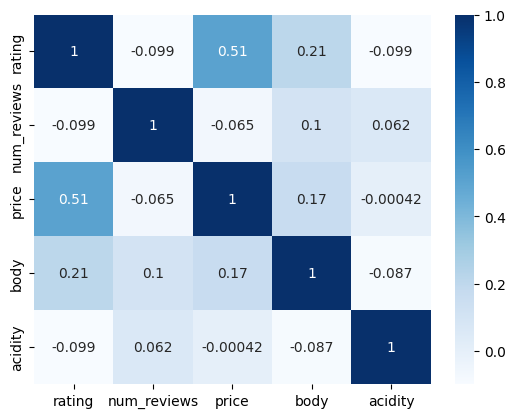

In [ ]:
print(df.corr())

dataplot = sns.heatmap(df.corr(), cmap='Blues', annot=True)

In [ ]:
# code from fundamental course
def hist_box_plot(column_name, unit_of_measure, bin_count):
    fig, (ax1,ax2) = plt.subplots(nrows =2, sharex=True, figsize=(8, 6),
                                  facecolor='w',
                                  gridspec_kw={'height_ratios':[0.75, 0.25]})
    plt.suptitle(f'{column_name}', y=1.02, va='center',
                 fontsize = 22, weight='bold')
    sns.histplot(data=df, x=column_name, linewidth=2,
                 ax=ax1, bins=bin_count);
    plt.xlabel(unit_of_measure, fontsize = 16, weight='bold')
    plt.xticks(weight='bold')
    ax1.set_ylabel('Instances',fontweight='bold',fontsize=18)
    ax1.tick_params( labelsize=10)
    ax1.set_yticklabels(ax1.get_yticks(), weight='bold')
    for axis in ['top','bottom','left','right']:
        ax1.spines[axis].set_linewidth(3)
    sns.boxplot(data=df, x=column_name, width=.5, ax=ax2,);
    ax2.tick_params( labelsize=10)
    ax2.set(xlabel=unit_of_measure);
    ax2.set_xticklabels(ax2.get_xticks(), fontweight='bold')
    ax2.spines['bottom'].set_linewidth(2)
    ax2.spines['top'].set_color(None)
    ax2.spines['left'].set_color(None)
    ax2.spines['right'].set_color(None)
    plt.tight_layout();
    plt.show;

array([[<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'num_reviews'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'body'}>],
       [<Axes: title={'center': 'acidity'}>, <Axes: >]], dtype=object)

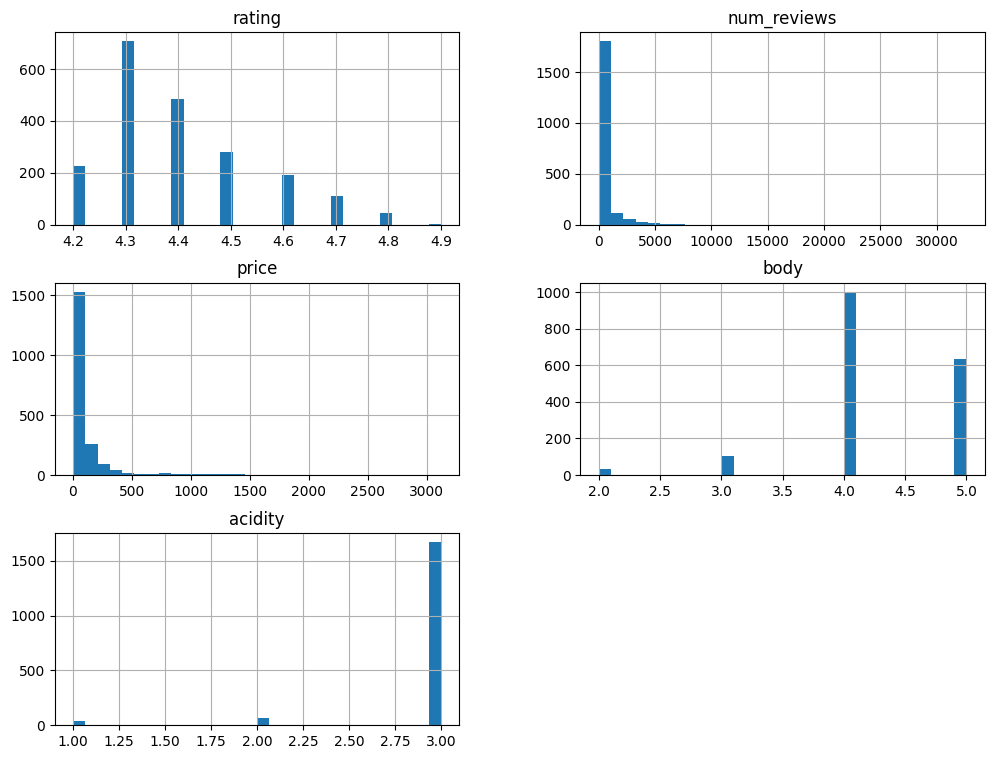

In [ ]:
df.hist(figsize=(12,9), bins=30)

* Rounding price to get cleaner target

In [ ]:
df['price'] = df['price'].round(1)
df.head()

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Toro,995.0,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Vino de Espana,313.5,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Ribera del Duero,325.0,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Ribera del Duero,693.0,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Ribera del Duero,778.1,Ribera Del Duero Red,5.0,3.0


In [ ]:
df.nunique()

winery         480
wine           847
year            71
rating           8
num_reviews    817
region          76
price          949
type            21
body             4
acidity          3
dtype: int64


 rating 



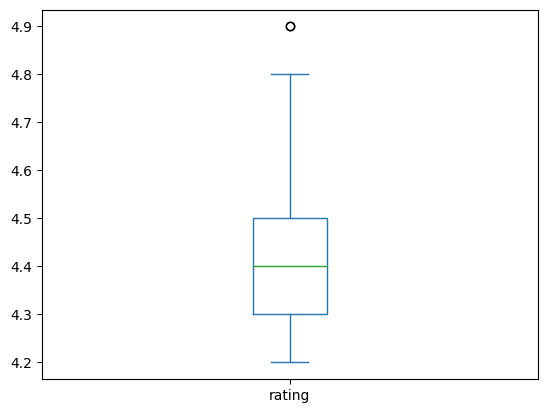


 num_reviews 



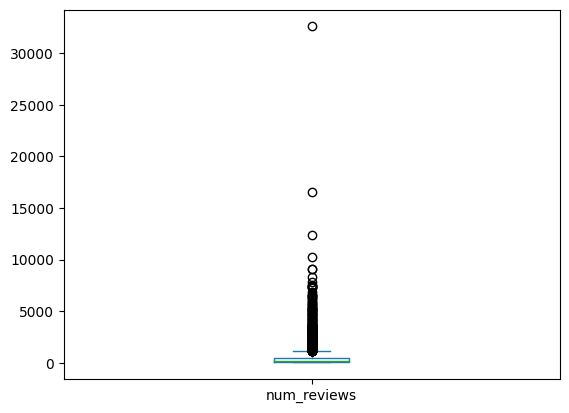


 price 



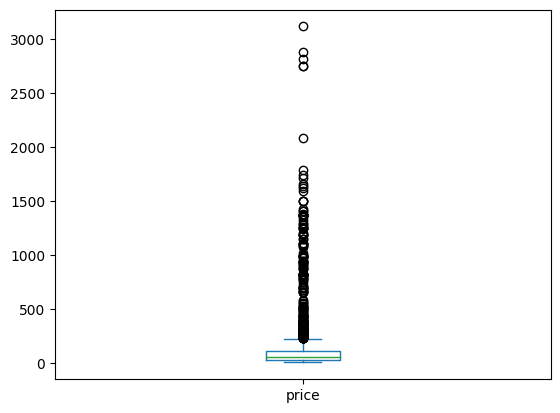


 body 



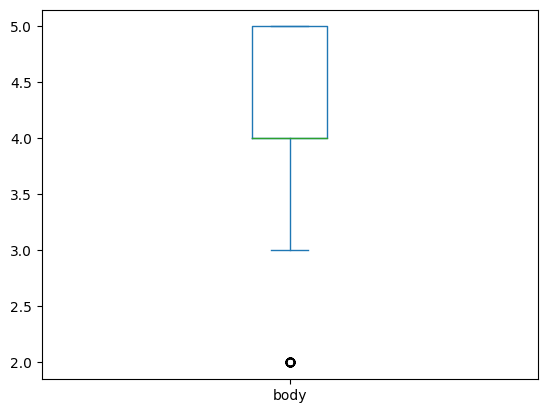


 acidity 



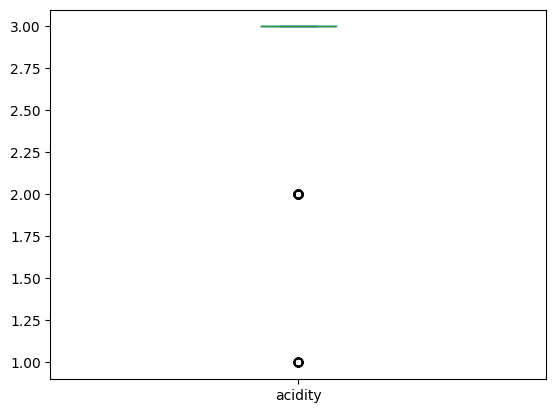

In [ ]:
for col in df.select_dtypes('number'):
  print('\n', col, '\n')
  df[col].plot(kind='box')
  plt.show()

In [ ]:
# source: https://plotly.com/python/line-and-scatter/
num_var = ['body', 'rating', 'price']
cat_var = 'type'
fig = px.scatter_matrix(df, dimensions=num_var, color=cat_var)
fig.update_traces(diagonal_visible=True)
fig.show()

## Feature Engineering

In [ ]:
for col in df.select_dtypes('object'):
  print(col, df[col].nunique())

winery 480
wine 847
year 71
region 76
type 21


In [ ]:
df.describe()

,rating,num_reviews,price,body,acidity
count,2048.000000,2048.000000,2048.000000,1777.000000,1777.000000
mean,4.401123,573.994629,135.246826,4.258863,2.921216
std,0.147023,1376.153171,272.176893,0.652836,0.334713
min,4.200000,25.000000,5.000000,2.000000,1.000000
25%,4.300000,58.000000,31.900000,4.000000,3.000000
50%,4.400000,141.000000,53.650000,4.000000,3.000000
75%,4.500000,485.500000,110.000000,5.000000,3.000000
max,4.900000,32624.000000,3119.100000,5.000000,3.000000


##Train Test Split

In [ ]:
def eval_regression(true, pred, name='Model'):
  scores = pd.DataFrame()
  scores['Model Name'] = [name]
  scores['RMSE'] = [np.sqrt(mean_squared_error(true, pred))]
  scores['MAE'] = [mean_absolute_error(true, pred)]
  scores['R2'] = [r2_score(true, pred)]
  return scores

In [ ]:
X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test =  train_test_split(X, y, random_state=42)

In [ ]:
y_train.head()

415     37.7
273    247.8
759     30.0
250     47.5
413     83.0
Name: price, dtype: float64

In [ ]:
X_train.head()

,winery,wine,year,rating,num_reviews,region,type,body,acidity
415,Juan Gil,Bruto,2018,4.5,384,Jumilla,Monastrell,5.0,3.0
273,Vega Sicilia,Valbuena 5o,1983,4.6,66,Ribera del Duero,Ribera Del Duero Red,5.0,3.0
759,Bodegas 6o Elemento - Vino Sexto Elemento,Tinto,2017,4.4,319,Valencia,Red,4.0,3.0
250,Carmelo Rodero,Pago De Valtarrena,2018,4.6,99,Ribera del Duero,Ribera Del Duero Red,5.0,3.0
413,Vina Sastre,Pago de Santa Cruz,2015,4.5,420,Ribera del Duero,Ribera Del Duero Red,5.0,3.0


##Modeling

In [ ]:
from sklearn.preprocessing import LabelEncoder

## Ordinal Data

* Ordinal columns were mapped and put in pipeline
* had continued problems with them
* moved to numeric

In [ ]:
df.head()

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Toro,995.0,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Vino de Espana,313.5,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Ribera del Duero,325.0,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Ribera del Duero,693.0,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Ribera del Duero,778.1,Ribera Del Duero Red,5.0,3.0


In [ ]:
df['body'].value_counts()

4.0    1003
5.0     634
3.0     106
2.0      34
Name: body, dtype: int64

In [ ]:
df['acidity'].value_counts()

3.0    1672
2.0      70
1.0      35
Name: acidity, dtype: int64

In [ ]:
df['rating'].value_counts()

4.3    706
4.4    484
4.5    281
4.2    228
4.6    191
4.7    112
4.8     44
4.9      2
Name: rating, dtype: int64

In [ ]:
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
label_encoder = LabelEncoder()
mean_imputer = SimpleImputer(strategy='mean')
missing_imputer = SimpleImputer(strategy='constant', fill_value='missing')


num_cols = ['body', 'acidity', 'rating']
cat_cols = make_column_selector(dtype_include='object')


num_pipe = make_pipeline(scaler, mean_imputer)
cat_pipe = make_pipeline(missing_imputer,ohe)
ord_pipe = make_pipeline(scaler, mean_imputer)

processor = make_column_transformer(
    (num_pipe, num_cols),
    (cat_pipe, cat_cols)
)

In [ ]:
df.head()

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Toro,995.0,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Vino de Espana,313.5,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Ribera del Duero,325.0,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Ribera del Duero,693.0,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Ribera del Duero,778.1,Ribera Del Duero Red,5.0,3.0


In [ ]:
X_train.head()

,winery,wine,year,rating,num_reviews,region,type,body,acidity
415,Juan Gil,Bruto,2018,4.5,384,Jumilla,Monastrell,5.0,3.0
273,Vega Sicilia,Valbuena 5o,1983,4.6,66,Ribera del Duero,Ribera Del Duero Red,5.0,3.0
759,Bodegas 6o Elemento - Vino Sexto Elemento,Tinto,2017,4.4,319,Valencia,Red,4.0,3.0
250,Carmelo Rodero,Pago De Valtarrena,2018,4.6,99,Ribera del Duero,Ribera Del Duero Red,5.0,3.0
413,Vina Sastre,Pago de Santa Cruz,2015,4.5,420,Ribera del Duero,Ribera Del Duero Red,5.0,3.0


In [ ]:
X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test =  train_test_split(X, y, random_state=42)

In [ ]:
X_train.head()

,winery,wine,year,rating,num_reviews,region,type,body,acidity
415,Juan Gil,Bruto,2018,4.5,384,Jumilla,Monastrell,5.0,3.0
273,Vega Sicilia,Valbuena 5o,1983,4.6,66,Ribera del Duero,Ribera Del Duero Red,5.0,3.0
759,Bodegas 6o Elemento - Vino Sexto Elemento,Tinto,2017,4.4,319,Valencia,Red,4.0,3.0
250,Carmelo Rodero,Pago De Valtarrena,2018,4.6,99,Ribera del Duero,Ribera Del Duero Red,5.0,3.0
413,Vina Sastre,Pago de Santa Cruz,2015,4.5,420,Ribera del Duero,Ribera Del Duero Red,5.0,3.0


### Decision Tree Regressor Model

In [ ]:

model = make_pipeline(processor, DecisionTreeRegressor(random_state = 42))
model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer())]),
                                                  ['body', 'acidity',
                                                   'rating']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7c9247bed840>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [ ]:
train_scores = eval_regression(y_train, train_pred, name='Train')

test_scores = eval_regression(y_test, test_pred, name='Test')

In [ ]:
print(f'Training R2 {r2_score(y_train, train_pred):.2f}')
print(f'Test R2 {r2_score(y_test, test_pred):.2f}')

Training R2 1.00
Test R2 0.54


In [ ]:
dec_train_scores = eval_regression(y_train, train_pred, name='Dec Tree train')
dec_test_scores = eval_regression(y_test, test_pred, name='Dec Tree Test')

In [ ]:
print(dec_train_scores)
print(dec_test_scores)

       Model Name  RMSE  MAE   R2
0  Dec Tree train   0.0  0.0  1.0
      Model Name        RMSE        MAE        R2
0  Dec Tree Test  177.415308  54.798633  0.536111


### Random Forest Regressor Model

In [ ]:

R_for = RandomForestRegressor()
for_pipe = make_pipeline(processor, R_for)
for_pipe.fit(X_train, y_train)
for_pipe.get_params()


{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler()),
                                                    ('simpleimputer',
                                                     SimpleImputer())]),
                                    ['body', 'acidity', 'rating']),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(fill_value='missing',
                                                                   strategy='constant')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=False))]),


In [ ]:
pipe_param_grid = {'randomforestregressor__n_estimators': [10, 50, 100],
                   'randomforestregressor__min_samples_split': [2, 4, 8],
                   'randomforestregressor__max_depth': [None, 5, 10]}

### Gridsearch CV

In [ ]:
for_pipe_gs = GridSearchCV(for_pipe, pipe_param_grid)

for_pipe_gs.fit(X_train, y_train)
print('Best Forest Parameters:')
print(for_pipe_gs.best_params_)
best_pipe = for_pipe_gs.best_estimator_
print(f'Accuracy of best forest model is: {best_pipe.score(X_test, y_test)}')

Best Forest Parameters:
{'randomforestregressor__max_depth': None, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__n_estimators': 50}
Accuracy of best forest model is: 0.5764776504657066


In [ ]:
train_pred1 = best_pipe.predict(X_train)
test_pred1 = best_pipe.predict(X_test)

In [ ]:
_train_scores = eval_regression(y_train, train_pred1, name='b train')
_test_scores = eval_regression(y_test, test_pred1, name='b Test')

In [ ]:
print(_train_scores)
print(_test_scores)

  Model Name       RMSE        MAE        R2
0    b train  56.293236  19.751353  0.958333
  Model Name        RMSE        MAE        R2
0     b Test  169.520429  48.837789  0.576478


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR

##PCA

In [ ]:
df.head()

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Toro,995.0,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Vino de Espana,313.5,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Ribera del Duero,325.0,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Ribera del Duero,693.0,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Ribera del Duero,778.1,Ribera Del Duero Red,5.0,3.0


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
X = df.drop(columns = 'price')
le = LabelEncoder()
y = le.fit_transform(df['price'])

In [ ]:
scaled_df = processor.fit_transform(X)

In [ ]:
pca = PCA(n_components=2)
pcs = pca.fit_transform(scaled_df)

### Clustering

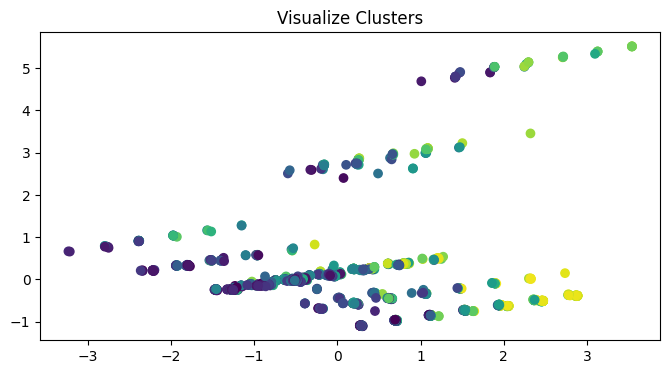

In [ ]:
plt.figure(figsize = (8, 4))
plt.scatter(pcs[:,0], pcs[:,1], c = y)
plt.title('Visualize Clusters');

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [ ]:
df1 = df[['body', 'rating']]
df1.head()

,body,rating
0,5.0,4.9
1,4.0,4.9
2,5.0,4.8
3,5.0,4.8
4,5.0,4.8


In [ ]:
scaled_df1 = num_pipe.fit_transform(df1)

In [ ]:
hc = AgglomerativeClustering(n_clusters = 2)
hc.fit(scaled_df1)

AgglomerativeClustering()

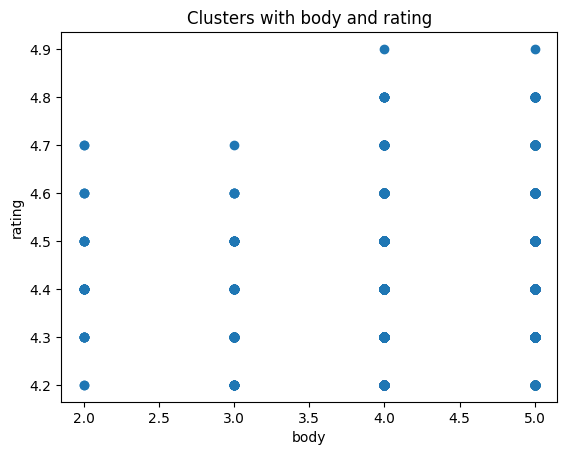

In [ ]:

plt.scatter(df1['body'], df1['rating'])
plt.xlabel('body')
plt.ylabel('rating')
plt.title('Clusters with body and rating');
cluster_labels = hc.fit(scaled_df1)


* Poor results from Clustering
made df messy

Random Forest best model so far
Testing
*  MAE        
  48.837789  
* R2  
  0.576478

Decision Tree
Test       
* MAE
  54.798633  
*  R2  
  0.536111

But low MAE on Training Data for both suggests overfitting

 * # Will look at trying Keras Machine Learning

## Neural Network in Keras

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import metrics
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

# This is used to overcome an issue with setting up tensorflow in M1/M1
# Suspect tensorflow-macos not very fit with GPU, use CPU only with
tf.config.set_visible_devices([], 'GPU')

# New libraries
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



In [ ]:
df.tail()

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
2046,Mustiguillo,Finca Terrerazo,2017,4.2,390,El Terrerazo,24.4,Red,4.0,3.0
2047,Matarromera,Gran Reserva,2011,4.2,389,Ribera del Duero,64.5,Ribera Del Duero Red,5.0,3.0
2048,Sei Solo,Preludio,2016,4.2,388,Ribera del Duero,31.6,Ribera Del Duero Red,5.0,3.0
2049,Vinedos de Paganos,El Puntido,2005,4.2,384,Rioja,73.0,Rioja Red,4.0,3.0
6100,Remirez de Ganuza,Rioja Blanco,2017,4.2,421,Rioja,29.2,Rioja White,NaN,NaN


In [ ]:
df.head()

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Toro,995.0,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Vino de Espana,313.5,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Ribera del Duero,325.0,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Ribera del Duero,693.0,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Ribera del Duero,778.1,Ribera Del Duero Red,5.0,3.0


In [ ]:

label_encoder = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col])

# Split the data into features and target
X = df.drop(columns=['price'])
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

processor = make_column_transformer(
    (num_pipe, num_cols),
    (cat_pipe, cat_cols)
)

# Apply preprocessing to the features
X_processed = processor.fit_transform(X)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, random_state=42)

# Build a simple neural network
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model
mse_test = model.evaluate(X_test, y_test)
print(f"Mean Squared Error (MSE): {mse_test}")

Epoch 1/10
48/48 [==============================] - 2s 6ms/step - loss: 95583.1562
Epoch 2/10
48/48 [==============================] - 0s 4ms/step - loss: 95493.3750
Epoch 3/10
48/48 [==============================] - 0s 4ms/step - loss: 95420.5312
Epoch 4/10
48/48 [==============================] - 0s 4ms/step - loss: 95353.8438
Epoch 5/10
48/48 [==============================] - 0s 3ms/step - loss: 95286.9688
Epoch 6/10
48/48 [==============================] - 0s 4ms/step - loss: 95213.7578
Epoch 7/10
48/48 [==============================] - 0s 3ms/step - loss: 95127.5000
Epoch 8/10
48/48 [==============================] - 0s 4ms/step - loss: 95020.0078
Epoch 9/10
48/48 [==============================] - 0s 3ms/step - loss: 94880.8672
Epoch 10/10
16/16 [==============================] - 0s 4ms/step - loss: 82631.7812
Mean Squared Error (MSE): 82631.78125


In [ ]:
y_train.head()

1671    14.9
952     38.0
1677    12.8
1251    99.9
482     78.4
Name: price, dtype: float64

In [ ]:
mse_train = model.evaluate(X_train, y_train)
print(f"Mean Squared Error (MSE): {mse_train}")

52/52 [==============================] - 0s 2ms/step - loss: 89930.6172
Mean Squared Error (MSE): 89930.6171875


In [ ]:
# multiclass LP
def plot_history(history):

  metrics = history.history.keys()

  for metric in metrics:
      if not 'val' in metric:
        plt.plot(history.history[f'{metric}'], label=f'{metric}')
        if f'val_{metric}' in metrics:
          plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
        plt.legend()
        plt.title(f'{metric}')
        plt.show()

In [ ]:
from sklearn.preprocessing import LabelBinarizer

In [ ]:
scaler = StandardScaler()

scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

### Binning

In [ ]:
encoder = LabelEncoder()
all_labels = np.concatenate((y_train, y_test))

encoder.fit(all_labels)

# Trans training test separately having issues with shape
y_train_enc = encoder.transform(y_train)
y_test_enc = encoder.transform(y_test)


classes = encoder.classes_

binarizer = LabelBinarizer()

binarizer.fit(y_train_enc)
y_train_bin = binarizer.transform(y_train_enc)
y_test_bin = binarizer.transform(y_test_enc)

print('Original Target')
print(y_train.head())

print('\nEncoded Target')
print(y_train_enc[:5])

print('\nBinarized Target')
print(y_train_bin[:5])


Original Target
415     37.7
273    247.8
759     30.0
250     47.5
413     83.0
Name: price, dtype: float64

Encoded Target
[224 764 159 293 477]

Binarized Target
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
input_dim = X_train_sc.shape[1]
num_classes = len(classes)

multi_model = Sequential()

multi_model.add(Dense(50, input_dim=input_dim, activation='relu'))
multi_model.add(Dropout(.3))
multi_model.add(Dense(50, activation='relu'))
multi_model.add(Dropout(.3))
multi_model.add(Dense(num_classes, activation='softmax'))
multi_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 50)                200       
                                                                 
 dropout_10 (Dropout)        (None, 50)                0         
                                                                 
 dense_36 (Dense)            (None, 50)                2550      
                                                                 
 dropout_11 (Dropout)        (None, 50)                0         
                                                                 
 dense_37 (Dense)            (None, 949)               48399     
                                                                 
Total params: 51,149
Trainable params: 51,149
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check the shapes of the data
print('X_train shape:', X_train.shape)
print('y_train_bin shape:', y_train_bin.shape)
print('X_test shape:', X_test.shape)
print('y_test_bin shape:', y_test_bin.shape)

# Ensure consistent number of samples
assert X_train_sc.shape[0] == y_train_bin.shape[0]
assert X_test_sc.shape[0] == y_test_bin.shape[0]

X_train shape: (1536, 3)
y_train_bin shape: (1536, 803)
X_test shape: (512, 3)
y_test_bin shape: (512, 803)


In [ ]:
optimizer = tf.keras.optimizers.legacy.Adam()

In [ ]:
model.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy',
                             metrics.Precision(),
                             metrics.Recall()
                             ])

In [ ]:
#raw pred
raw_pred = model.predict(X_test_sc)

print('Raw Predictions\n', raw_pred[:5])
print('\nbinarized y_test\n', y_test_bin[:5])

16/16 [==============================] - 0s 2ms/step
Raw Predictions
 [[0.92251784]
 [3.0419664 ]
 [2.5693853 ]
 [0.7931121 ]
 [2.4951131 ]]

binarized y_test
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# convert
y_pred = np.argmax(raw_pred, axis=1)
y_true = np.argmax(y_test_bin, axis=1)

print('integer predictions', y_pred)
print('integer true labels', y_true)

integer predictions [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 

In [ ]:
print(classes)

[   5.     5.5    6.3    7.     7.1    7.9    8.6    8.9    9.     9.8
    9.9   10.    10.2   10.4   10.8   10.9   11.2   11.4   11.5   11.6
   11.7   11.8   11.9   12.    12.2   12.3   12.8   12.9   13.2   13.4
   13.5   13.6   13.8   14.    14.2   14.5   14.6   14.7   14.8   14.9
   15.    15.4   15.5   15.6   15.7   15.8   15.9   16.    16.1   16.2
   16.4   16.5   16.8   16.9   17.    17.1   17.2   17.5   17.7   17.8
   17.9   18.    18.2   18.4   18.5   18.6   18.9   19.    19.2   19.4
   19.5   19.6   19.7   19.8   19.9   20.    20.2   20.4   20.5   20.6
   20.7   20.9   21.    21.2   21.3   21.4   21.5   21.6   21.7   21.8
   21.9   22.    22.4   22.5   22.6   22.8   22.9   23.    23.1   23.2
   23.4   23.5   23.6   23.7   23.8   23.9   24.    24.1   24.4   24.5
   24.6   24.7   24.8   24.9   25.    25.1   25.2   25.3   25.4   25.5
   25.6   25.7   25.8   25.9   26.    26.1   26.2   26.3   26.4   26.5
   26.6   26.8   26.9   27.    27.1   27.2   27.3   27.4   27.5   27.6
   27.

In [ ]:
report = classification_report(y_true, y_pred, labels=range(len(classes)))
print(report)

              precision    recall  f1-score   support

           0       0.30      1.00      0.47       156
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00    

ValueError: ignored

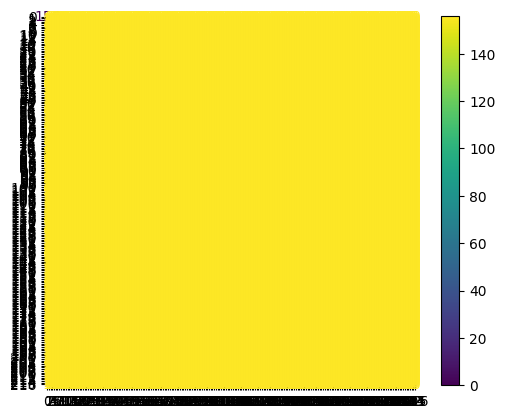

In [ ]:

ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                                        display_labels=classes,
                                        xticks_rotation=45);

In [ ]:
X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test =  train_test_split(X, y, random_state=3)

In [ ]:
model = make_pipeline(processor)
model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer())]),
                                                  ['body', 'acidity',
                                                   'rating']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7c92a2c463e0>)]))])

In [ ]:

X_train =model.fit(X_train)
X_test = model.fit(X_test)

In [ ]:
input_shape = X_train.shape[1]
input_shape


AttributeError: ignored

In [ ]:
X_train.head()

,winery,wine,year,rating,num_reviews,region,type,body,acidity,Cluster
415,Juan Gil,Bruto,2018,4.5,384,Jumilla,Monastrell,5.0,3.0,0
273,Vega Sicilia,Valbuena 5o,1983,4.6,66,Ribera del Duero,Ribera Del Duero Red,5.0,3.0,0
759,Bodegas 6o Elemento - Vino Sexto Elemento,Tinto,2017,4.4,319,Valencia,Red,4.0,3.0,1
250,Carmelo Rodero,Pago De Valtarrena,2018,4.6,99,Ribera del Duero,Ribera Del Duero Red,5.0,3.0,0
413,Vina Sastre,Pago de Santa Cruz,2015,4.5,420,Ribera del Duero,Ribera Del Duero Red,5.0,3.0,0


## Keras Neural Network Results

### Testing
* Mean Squared Error (MSE): 82631.78125
### Training
* Mean Squared Error (MSE): 89930.6171875

* Had issues with shape, this method seemed to want even features.
* The target has 1000 unique integers from 5-3000+ that seemed to cause issues binning

* with poor performance on both training and testing we have moved to Underfitting, with too simple of model

* Will try different Neural Network, and will bring back original dataframe and features

## Regression Neural Model

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week07/Data/wines_SPA.csv")
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [ ]:
df.describe()

,rating,num_reviews,price,body,acidity
count,7500.000000,7500.000000,7500.000000,6331.000000,6331.000000
mean,4.254933,451.109067,60.095822,4.158427,2.946612
std,0.118029,723.001856,150.356676,0.583352,0.248202
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.200000,389.000000,18.900000,4.000000,3.000000
50%,4.200000,404.000000,28.530000,4.000000,3.000000
75%,4.200000,415.000000,51.350000,5.000000,3.000000
max,4.900000,32624.000000,3119.080000,5.000000,3.000000


In [ ]:
df.duplicated().sum()

5452

* year to numeric

In [ ]:
df['year'] = df['year'].replace('N.V.', np.NaN)
df = df.dropna()
df['year'] = df['year'].astype(np.int64)

* all wines are from spain

In [ ]:
df = df.drop(columns=['country'])
df.head()

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6070 entries, 0 to 7499
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       6070 non-null   object 
 1   wine         6070 non-null   object 
 2   year         6070 non-null   int64  
 3   rating       6070 non-null   float64
 4   num_reviews  6070 non-null   int64  
 5   region       6070 non-null   object 
 6   price        6070 non-null   float64
 7   type         6070 non-null   object 
 8   body         6070 non-null   float64
 9   acidity      6070 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 521.6+ KB


* going to try ohe the objects for neural network

In [ ]:
y = OneHotEncoder().fit_transform(df[['type', 'winery', 'wine', 'region']]).toarray()
print(y)
y.shape

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(6070, 1156)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6070 entries, 0 to 7499
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       6070 non-null   object 
 1   wine         6070 non-null   object 
 2   year         6070 non-null   int64  
 3   rating       6070 non-null   float64
 4   num_reviews  6070 non-null   int64  
 5   region       6070 non-null   object 
 6   price        6070 non-null   float64
 7   type         6070 non-null   object 
 8   body         6070 non-null   float64
 9   acidity      6070 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 521.6+ KB


In [ ]:
X = df.drop(columns=['price'])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

# lists of columns for transformer
cat_cols = [ 'winery','wine','region','type' ]
num_cols = X_train.columns.drop(cat_cols)

# column transformer
preprocessor = make_column_transformer((ohe, cat_cols), (scaler, num_cols))

# process the data
preprocessor.fit(X_train)
X_train_proc = preprocessor.transform(X_train)
X_test_proc = preprocessor.transform(X_test)

X_train_proc.shape

(4552, 1028)

In [ ]:
input_dim = X_train_proc.shape[1]

reg_model = Sequential()

reg_model.add(Dense(10, input_dim=input_dim, activation='relu'))
reg_model.add(Dense(10, activation='relu'))
reg_model.add(Dense(1, activation='linear'))

reg_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                10290     
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 10,411
Trainable params: 10,411
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def plot_history(history):
  """Takes a keras model learning history and plots each metric"""

  metrics = history.history.keys()

  for metric in metrics:
      if not 'val' in metric:
        plt.plot(history.history[f'{metric}'], label=f'{metric}')
        if f'val_{metric}' in metrics:
          plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
        plt.legend()
        plt.title(f'{metric}')
        plt.show()

In [ ]:
reg_model.compile(loss='mse',
                  optimizer='adam',
                  metrics=[metrics.MeanAbsoluteError(),
                           metrics.RootMeanSquaredError()])

In [ ]:
history = reg_model.fit(X_train_proc, y_train,
                        validation_data = (X_test_proc, y_test),
                        epochs=100,
                        verbose=0)

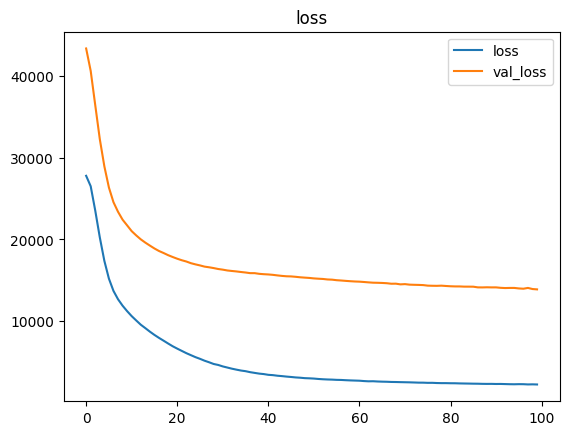

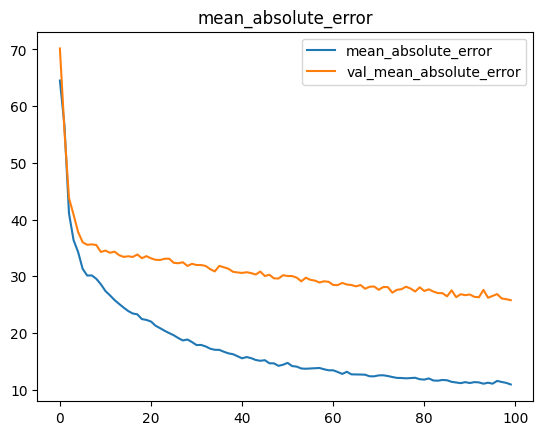

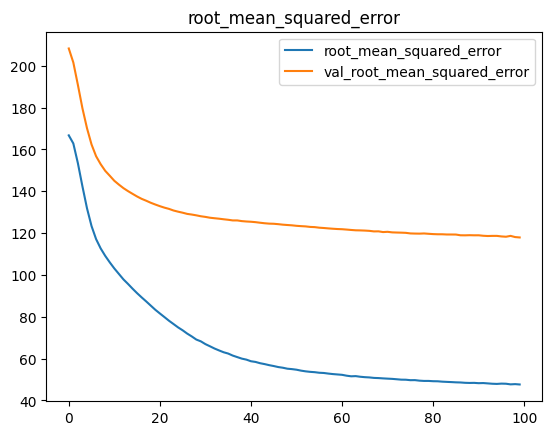

In [ ]:
plot_history(history)

### Testing results

In [ ]:
y_pred = reg_model.predict(X_test_proc)

print(f'final RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'final MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'final R2: {r2_score(y_test, y_pred)}')

48/48 [==============================] - 0s 3ms/step
final RMSE: 117.88450763251407
final MAE: 25.78763589964053
final R2: 0.6397004164270137


### Training results

In [ ]:
y_pr = reg_model.predict(X_train_proc)

print(f'final RMSE: {np.sqrt(mean_squared_error(y_train, y_pr))}')
print(f'final MAE: {mean_absolute_error(y_train, y_pr)}')
print(f'final R2: {r2_score(y_train, y_pr)}')

143/143 [==============================] - 1s 7ms/step
final RMSE: 46.95389822242929
final MAE: 10.350155257506525
final R2: 0.9067703845452114


Best model on testing
 * MAE: 25.787
 * R2: 64%